In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

import matplotlib

csv_path = "BankChurners.csv"

# Import the BankChurners.csv file as a DataFrame
data= pd.read_csv(csv_path)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [18]:
# to generate a new column with numeric values

project = {"Unknown": 0, "Less than $40K": 20, "$40K - $60K": 40, "$60K - $80K": 60, "$80K - $120K": 80,"$120K + ": 120}
data['income_int'] = data['Income_Category'].apply(lambda x: project.get(x))
data


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,income_int,Age groups
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,60.0,40-49
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,20.0,40-49
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,80.0,50-59
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,20.0,40-49
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,60.0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,40.0,50-59
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,40.0,40-49
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,20.0,40-49
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,40.0,30-39


In [20]:
bins = [20, 29, 39, 49, 59, 69, 79]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
NewAge_df = data["Age groups"] = pd.cut(data["Customer_Age"], bins, labels=labels)

NewAge_df

0        40-49
1        40-49
2        50-59
3        40-49
4        40-49
         ...  
10122    50-59
10123    40-49
10124    40-49
10125    30-39
10126    40-49
Name: Customer_Age, Length: 10127, dtype: category
Categories (6, object): ['20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [22]:
DataMerge_df = pd.merge(data, NewAge_df, how="left", on="Customer_Age")
DataMerge_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,income_int,Age groups
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,60.0,40-49
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,20.0,40-49
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,80.0,50-59
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,20.0,40-49
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,60.0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,40.0,50-59
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,40.0,40-49
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,20.0,40-49
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,40.0,30-39


In [24]:
#also just to tidy up your data frame so its easier to look at you could do this,

moses_cols = ["Attrition_Flag", "Gender", "Customer_Age", "Age groups", "Income_Category", "Months_on_book", "income_int"]

new_data_df = DataMerge_df[moses_cols]

new_data_df


,Attrition_Flag,Gender,Customer_Age,Age groups,Income_Category,Months_on_book,income_int
0,Existing Customer,M,45,40-49,$60K - $80K,39,60.0
1,Existing Customer,F,49,40-49,Less than $40K,44,20.0
2,Existing Customer,M,51,50-59,$80K - $120K,36,80.0
3,Existing Customer,F,40,40-49,Less than $40K,34,20.0
4,Existing Customer,M,40,40-49,$60K - $80K,21,60.0
...,...,...,...,...,...,...,...
10122,Existing Customer,M,50,50-59,$40K - $60K,40,40.0
10123,Attrited Customer,M,41,40-49,$40K - $60K,25,40.0
10124,Attrited Customer,F,44,40-49,Less than $40K,36,20.0
10125,Attrited Customer,M,30,30-39,$40K - $60K,36,40.0


In [7]:
data_groupby_gender=data.groupby(["Gender"])



In [32]:
data_groupby_gender
Gender_vs_monthsonbook=pd.DataFrame(data_groupby_gender["Months_on_book"].count())
Gender_vs_monthsonbook

,Months_on_book
Gender,
F,5358
M,4769


<AxesSubplot:xlabel='Gender'>

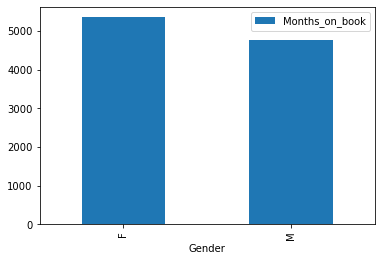

In [9]:
# Bar chart for Gender and month on book
Gender_vs_monthsonbook.plot(kind = "bar")


In [29]:
data_groupby_MStatus=data.groupby(["Marital_Status"])

data_groupby_gender
MStatus_vs_monthsonbook=pd.DataFrame(data_groupby_MStatus["Months_on_book"].count())
MStatus_vs_monthsonbook

,Months_on_book
Marital_Status,
Divorced,748
Married,4687
Single,3943
Unknown,749


In [30]:
data["Marital_Status"].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status'>

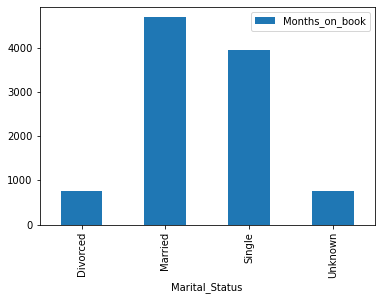

In [14]:
# Bar chart for Gender based on  month on book
MStatus_vs_monthsonbook.plot(kind = "bar")

In [34]:
data_groupby_AgeGroups=data.groupby(["Age groups"])

data_groupby_AgeGroups
AgeGroups_vs_monthsonbook=pd.DataFrame(data_groupby_MStatus["Months_on_book"].count())
AgeGroups_vs_monthsonbook

,Months_on_book
Age groups,
20-29,195
30-39,1841
40-49,4561
50-59,2998
60-69,530
70-79,2


<AxesSubplot:xlabel='Age groups'>

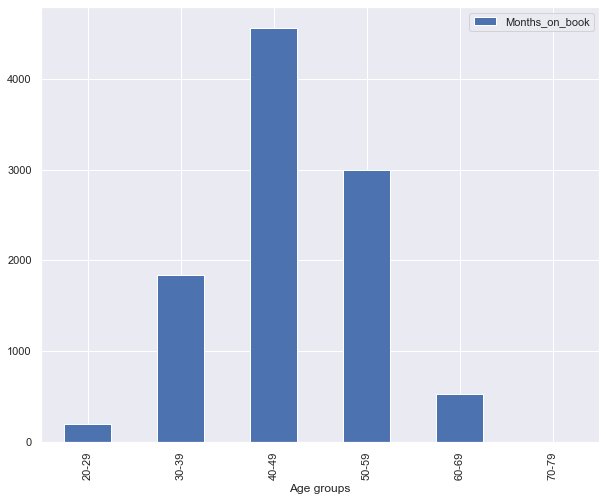

In [35]:
# Bar chart for Age groups based on month on book
AgeGroups_vs_monthsonbook.plot(kind = "bar")

In [13]:
age_book = ["Customer_Age", "Months_on_book"]

AgeBook = data[age_book]

AgeBook

,Customer_Age,Months_on_book
0,45,39
1,49,44
2,51,36
3,40,34
4,40,21
...,...,...
10122,50,40
10123,41,25
10124,44,36
10125,30,36


C:\Users\agunb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(60, 30, 'y = 0.79x + -0.48')

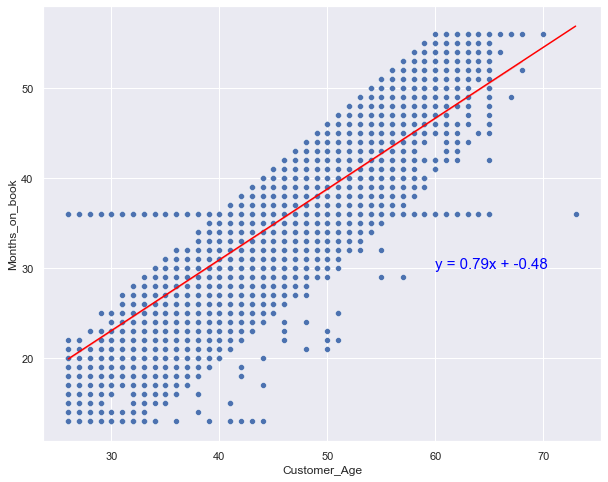

In [31]:
(c_slope, c_int, c_r, c_p, c_stderr) = st.linregress(AgeBook["Customer_Age"], AgeBook["Months_on_book"])

c_fit = c_slope * AgeBook["Customer_Age"] + c_int
line_eq = "y = " + str(round(c_slope,2)) + "x + " + str(round(c_int,2))
regression = AgeBook["Customer_Age"] * c_slope + c_int


palette = ['tab:green', 'tab:red']
sns.set(rc={"figure.figsize":(10, 8)})
sns.scatterplot(x=AgeBook["Customer_Age"], y=AgeBook["Months_on_book"],  marker="o", palette=palette, )
sns.lineplot(AgeBook["Customer_Age"], regression, color="red")  
plt.annotate(line_eq,(60,30),fontsize=15,color="blue")